In [550]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
train = pd.read_csv("../input/analyticsvidya/train.csv")
test = pd.read_csv("../input/analyticsvidya/test.csv")
train.shape, test.shape
train2 = train
test2 = test
train2.shape, test2.shape
train2 = pd.get_dummies(train2, columns=['source'])
#train2 = pd.get_dummies(train2, columns=['financial_institution'])
train2 = pd.get_dummies(train2, columns=['loan_purpose'])
test2 = pd.get_dummies(test2, columns=['source'])
#test2 = pd.get_dummies(test2, columns=['financial_institution'])
test2 = pd.get_dummies(test2, columns=['loan_purpose'])
#train2["origination_date"] = pd.to_datetime(train2["origination_date"], format="%Y/%m/%d")
#train2["first_payment_date"] = pd.to_datetime(train2["first_payment_date"], format="%m/%Y")
#train2["DAYSDIFF"] = train2["first_payment_date"] - train2["origination_date"]
#train2['DAYSDIFF'] = train2['DAYSDIFF'].dt.days.astype('int16')

#test2["first_payment_date"] = pd.to_datetime(test2["first_payment_date"].str.upper(), format='%b-%y', yearfirst=False)
#test2["origination_date"] = pd.to_datetime(test2["origination_date"], format="%d/%m/%y")
#test2["first_payment_date"] = pd.to_datetime(test2["first_payment_date"], format='%y/%m/%d')
#test2["DAYSDIFF"] = test2["first_payment_date"] - test2["origination_date"]
#test2['DAYSDIFF'] = test2['DAYSDIFF'].dt.days.astype('int16')
del train2["origination_date"]
del train2["first_payment_date"]
del train2["financial_institution"]
del test2["origination_date"]
del test2["first_payment_date"]
del test2["financial_institution"]
#del train2['source']
#del train2['loan_purpose']
#del test2['source']
#del test2['loan_purpose']

In [551]:
train2.head(3)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [552]:
#train2["int_term"] = train2['loan_term']/train2['interest_rate']
#train2["tot_cs"] = train2['borrower_credit_score']+train2['co-borrower_credit_score']
#train2["Loan2DebtRatio"] = train2['loan_to_value']/train2['debt_to_income_ratio']
#train2["Loan2Debtsum"] = train2['loan_to_value']+train2['debt_to_income_ratio']
#train2["bal_IR"] = train2['unpaid_principal_bal']/train2['interest_rate']
#train2["bcs_upb"] = train2['unpaid_principal_bal']/train2['borrower_credit_score']
#train2["income"] = train2['unpaid_principal_bal']/train2['debt_to_income_ratio']
#train2["value"] = train2['unpaid_principal_bal']/train2['loan_to_value']
#train2["lt_cs"] = train2['borrower_credit_score']/train2['loan_term']
#train2["bcs_income"] = train2['income']/train2['borrower_credit_score']
#train2["log_unpaid_principal_bal"] = np.log(train2['unpaid_principal_bal'])
#train2["log_Loan2DebtRatio"] = np.log(train2['Loan2DebtRatio'])
#train2["log_Loan2Debtsum"] = np.log(train2['Loan2Debtsum'])

In [553]:
train2.head(5)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,601385667462,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0
4,273870029961,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1


In [554]:
#test2["int_term"] = test2['loan_term']/test2['interest_rate']#
#test2["tot_cs"] = test2['borrower_credit_score']+test2['co-borrower_credit_score']
#test2["Loan2DebtRatio"] = test2['loan_to_value']/test2['debt_to_income_ratio']
#test2["Loan2Debtsum"] = test2['loan_to_value']+test2['debt_to_income_ratio']
#test2["bal_IR"] = test2['unpaid_principal_bal']/test2['interest_rate']
#test2["bcs_upb"] = test2['unpaid_principal_bal']/test2['borrower_credit_score']
#test2["income"] = test2['unpaid_principal_bal']/test2['debt_to_income_ratio']
#test2["value"] = test2['unpaid_principal_bal']/test2['loan_to_value']
#test2["lt_cs"] = test2['borrower_credit_score']/test2['loan_term']
#test2["bcs_income"] = test2['income']/test2['borrower_credit_score']
#test2["log_unpaid_principal_bal"] = np.log(test2['unpaid_principal_bal'])
#test2["log_Loan2DebtRatio"] = np.log(test2['Loan2DebtRatio'])
#test2["log_Loan2Debtsum"] = np.log(test2['Loan2Debtsum'])

In [555]:
test2.head(3)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,1,3.875,417000,360,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,2,4.500,113000,360,80,2,33,793,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,3,4.500,72000,360,75,1,34,710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [556]:
del train2["loan_id"]
del test2["loan_id"]

In [557]:
train2.shape, test2.shape

((116058, 29), (35866, 28))

In [558]:
from sklearn.model_selection import train_test_split
train3,test3 = train_test_split(train2,test_size=.3,random_state = 123)

In [559]:
train3.shape, test3.shape

((81240, 29), (34818, 29))

In [560]:
train3.head(3)

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
11010,4.125,270000,360,80,2.0,41.0,762.0,0.0,764.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76694,4.320,147000,360,68,2.0,30.0,757.0,0.0,772.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
59914,4.500,145000,360,78,2.0,42.0,753.0,0.0,753.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [561]:
test3.head(3)

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
28451,4.250,404000,360,67,2.0,39.0,771.0,0.0,767.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
27062,3.375,371000,120,62,2.0,25.0,760.0,0.0,739.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
78581,4.625,200000,360,67,1.0,41.0,761.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [562]:
#seperating dependent and independent variables
train_X = train3[[i for i in train3.columns if i not in [ 'm13']]]
train_Y = train3[["m13"]]

test_X  = test3[[i for i in test3.columns if i not in [ 'm13']]]
test_Y  = test3[["m13"]]

In [563]:
from sklearn.utils import resample

#separating majority and minority classes
df_majority = train3[train3["m13"] == 0]
df_minority = train3[train3["m13"] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples =197969,
                                 random_state=123)

df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)

df_upsampled_X = df_upsampled[[i for i in df_upsampled.columns if i not in [ 'm13']]]
df_upsampled_Y = df_upsampled[["m13"]]

In [564]:
from sklearn.utils import resample

#separating majority and minority classes
df_majority = train3[train3["m13"] == 0]
df_minority = train3[train3["m13"] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=17288,
                                   random_state=123)

df_downsampled = pd.concat([df_minority,df_majority_downsampled],axis=0)

#splitting dependent and independent variables

df_downsampled_X = df_downsampled[[i for i in df_downsampled.columns if i not in [ 'm13']]]
df_downsampled_Y = df_downsampled[["m13"]]

In [565]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):
    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy score :  0.9956631627319202
Recall score   :  0.5972222222222222
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34674
           1       0.48      0.60      0.53       144

    accuracy                           1.00     34818
   macro avg       0.74      0.80      0.77     34818
weighted avg       1.00      1.00      1.00     34818



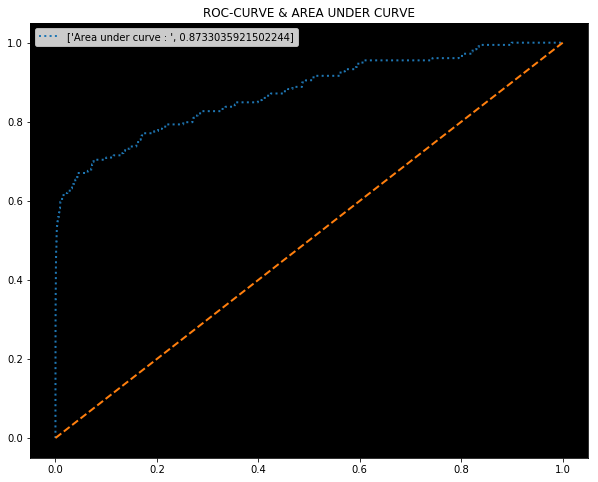

In [566]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
model(xgb,df_downsampled_X,df_downsampled_Y,test_X,test_Y,df_downsampled_X.columns)

In [567]:
test_sub_X = test2
xgb1 = XGBClassifier()
xgb.fit(df_downsampled_X,df_downsampled_Y)
sub_prob = xgb.predict_proba(test_sub_X)[:,1]
sub_prob = pd.DataFrame(sub_prob)
#ids = application_test[["SK_ID_CURR"]]
#subm  = ids.merge(sub_prob,left_index=True,right_index=True,how="left")
#sample_submission  = subm.rename(columns={"SK_ID_CURR":'SK_ID_CURR',0:'TARGET'})

In [568]:
sub_prob

,0
0,0.006039
1,0.006152
2,0.054782
3,0.001476
4,0.003715
5,0.004910
6,0.003351
7,0.014181
8,0.002326
9,0.034932


In [569]:
sub_prob[sub_prob>0.5] = 1
sub_prob[sub_prob<0.5] = 0

In [570]:
submission = pd.read_csv("../input/analyticsvidya/sample_submission.csv")

In [571]:
submission.m13 = sub_prob

In [572]:
submission.to_csv("submission.csv", index=False)

In [573]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv